# Flight Price Prediction

## Importing Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Suppress specific FutureWarnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # Importing Support Vector Regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

### Loading the Flight Fare Data## Importing dataset
 - Since data is in form of excel file we have to use pandas read_excel to load the data

In [2]:
Train_data=pd.read_excel("Data_Train.xlsx")
#no of rows and columns 
Train_data.shape

(10683, 11)

In [3]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
Q1 = Train_data['Price'].quantile(0.25)
Q3 = Train_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flight_df[(flight_df['Price'] < lower_bound) | (flight_df['Price'] > upper_bound)]
print("Outliers in Flight Prices:\n")
outliers

NameError: name 'flight_df' is not defined

In [435]:
#train data has no null value  null values 

In [5]:
Test_data=pd.read_excel("Test_set.xlsx")
Test_data.shape

(2671, 10)

In [6]:
# Combine the datasets using concat
flight_df = pd.concat([Train_data, Test_data], ignore_index=True, sort=False)

### Data Inspection

In [7]:
# first five rows of the dataset?
flight_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


#### Shape of the dataset

In [8]:
flight_df.shape

(13354, 11)

#### Summary of the dataset


In [9]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Since this dataset has only 1 numercial column, describe() will display summary statistics only for the "Price" column.

In [10]:
#information about the data, checking datatypes

flight_df.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


## Dataset Overview
- Total Entries: 13,354 (rows)
- Total Columns: 11
- Key Columns:
- Airline: Categorical
- Date_of_Journey: Object (to be converted to datetime)
- Source: Categorical
- Destination: Categorical
- Route: Object (1 missing value)
- Dep_Time: Object (to be converted to datetime)
- Arrival_Time: Object (to be converted to datetime)
- Duration: Object (to be cleaned and possibly converted)
- Total_Stops: Object (1 missing value)
- Additional_Info: Object
- Price: Numeric (int64)
- Missing Values:
- Route: 1 missing value
- Total_Stops: 1 missing value
- Data Type Conversions Needed:
 - Convert Date_of_Journey, Dep_Time, and Arrival_Time to appropriate datetime formats.
 - Consider converting Total_Stops to numeric or categorical as needed.

### Exploratory Data Analysis (EDA)

#### Bar chart showing top 10 most preferred Airlines

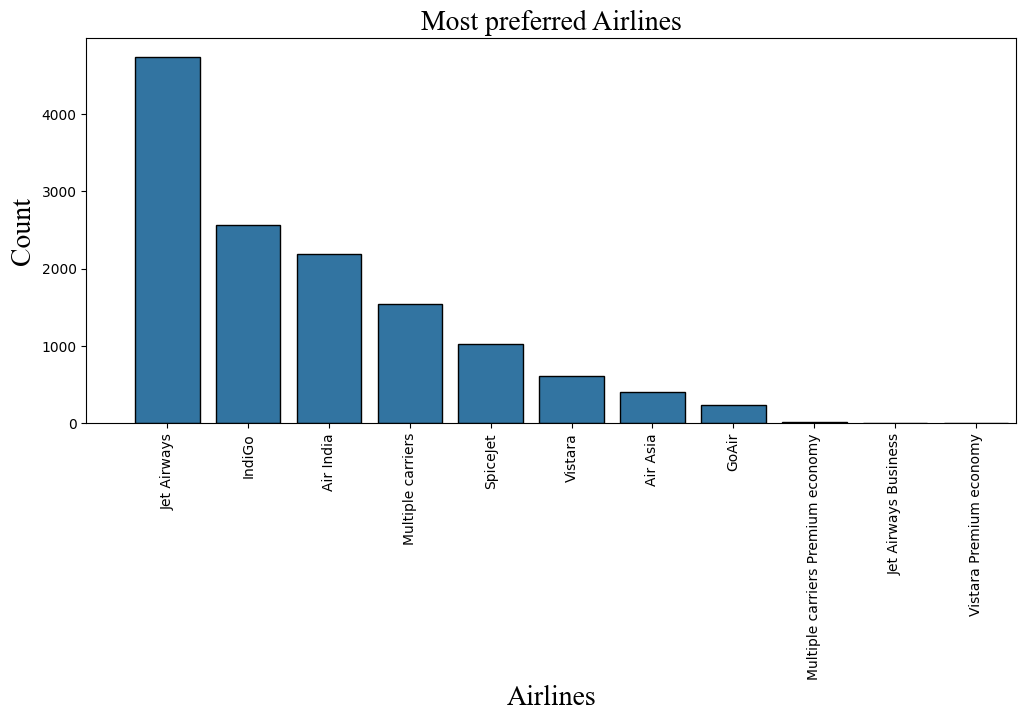

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

##### Insights
- Most preferred Airline is "Jet Airways"
- From all the total flight tickets sold, Jet Airways has the highest share followed by Indigo.

#### Airlines Vs Flight ticket Price

In [12]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


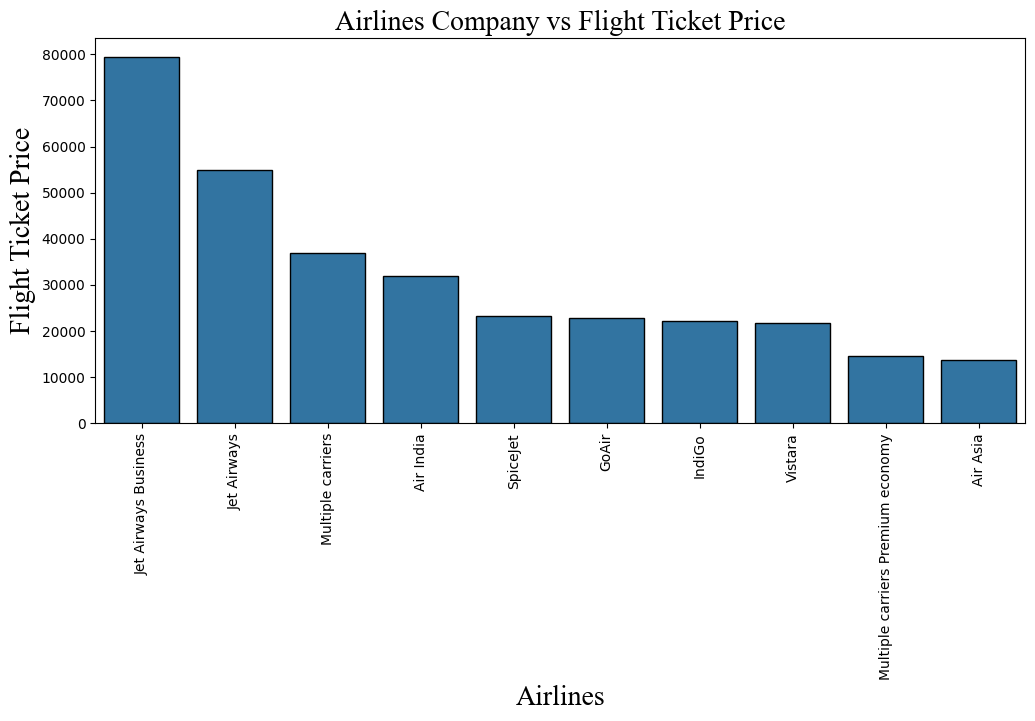

In [13]:
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

##### Insights
- "Jet Airways Business" tickets are the most expensive ones.

#### Price on Weekdays vs Weekends

In [14]:
days_df = flight_df[['Airline','Date_of_Journey', 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897.0
1,Air India,1/05/2019,7662.0
2,Jet Airways,9/06/2019,13882.0
3,IndiGo,12/05/2019,6218.0
4,IndiGo,01/03/2019,13302.0


In [15]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897.0,Sunday,1
1,Air India,2019-05-01,7662.0,Wednesday,0
2,Jet Airways,2019-06-09,13882.0,Sunday,1
3,IndiGo,2019-05-12,6218.0,Sunday,1
4,IndiGo,2019-03-01,13302.0,Friday,0


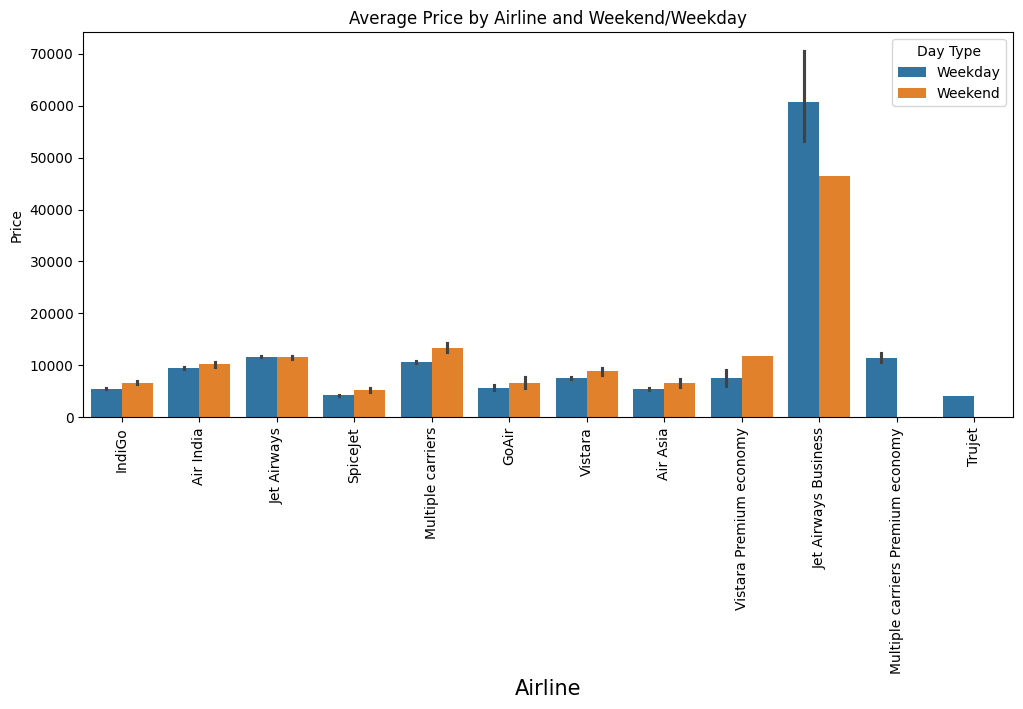

In [16]:

# Check and convert Weekend to categorical
if days_df['Weekend'].dtype != 'category':
    days_df['Weekend'] = days_df['Weekend'].map({0: 'Weekday', 1: 'Weekend'}).astype('category')

# Plotting
plt.subplots(figsize=(12, 5))
sns.barplot(data=days_df, x='Airline', y='Price', hue='Weekend')
plt.xlabel("Airline", size=15)
plt.xticks(rotation=90)
plt.title('Average Price by Airline and Weekend/Weekday')
plt.legend(title='Day Type')  # Optional
plt.show()


##### Insights
- The Price of tickets is higher on Weekends.

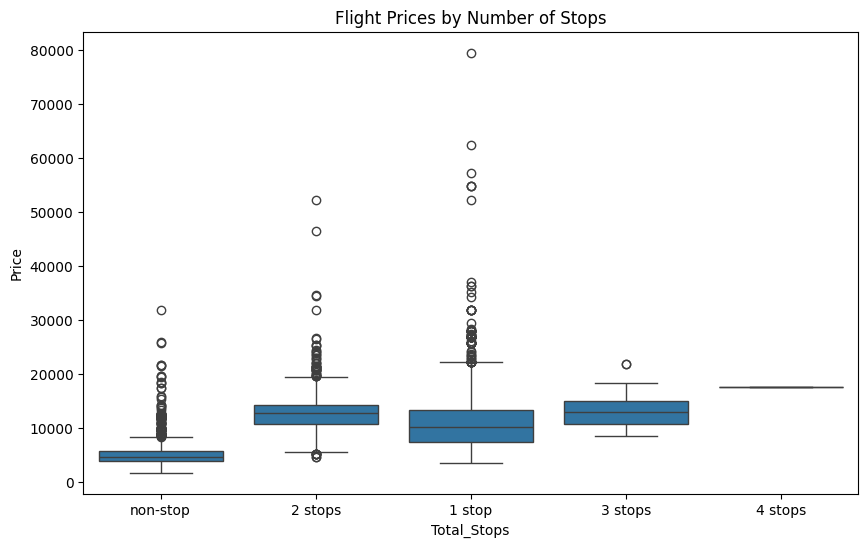

,Total_Stops,Mean_Price,Min_Price,Max_Price
0,1 stop,10594.123556,3480,79512
1,2 stops,12715.807895,4647,52285
2,3 stops,13112.000000,8607,21829
3,4 stops,17686.000000,17686,17686
4,non-stop,5024.900315,1759,31945


In [17]:
# Boxplot for Price by Total Stops
plt.figure(figsize=(10, 6))
sns.boxplot(data=Train_data, x='Total_Stops', y='Price')
plt.title('Flight Prices by Number of Stops')
plt.show()

# Creating a summary DataFrame
price_summary = Train_data.groupby('Total_Stops')['Price'].agg(['mean',  'min', 'max']).reset_index()
price_summary.columns = ['Total_Stops', 'Mean_Price', 'Min_Price', 'Max_Price']

# Display the summary DataFrame
price_summary


### Insights

 - More stops, higher prices: The average price tends to increase as the number of stops increases,
 - but non-stop flights remain the most economical option overall.

## Data Preprocessing 

#### Data cleaning --> Outlier Detection

In [18]:
Q1 = flight_df['Price'].quantile(0.25)
Q3 = flight_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = flight_df[(flight_df['Price'] < lower_bound) | (flight_df['Price'] > upper_bound)]
print("Outliers in Flight Prices:\n")
outliers



Outliers in Flight Prices:



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430.0
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983.0
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890.0
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890.0
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139.0
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210.0
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209.0
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890.0
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825.0


### Removing Outlier

In [19]:
# Remove outliers from the dataset
flight_df_cleaned = flight_df[~flight_df['Price'].isin(outlier_analysis['Price'])]


# Verify the shape of the new dataset
print("Original Data Shape:", flight_df.shape)
print("Cleaned Data Shape:", flight_df_cleaned.shape)


NameError: name 'outlier_analysis' is not defined

## Check for duplicate rows

In [20]:
duplicate_rows = flight_df[flight_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:\n") 
duplicate_rows


Duplicate Rows:



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376.0
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231.0
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392.0
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368.0
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303.0
...,...,...,...,...,...,...,...,...,...,...,...
13219,Air India,3/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 04 Jun,21h 15m,2 stops,No info,NaN
13236,Jet Airways,15/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,No info,NaN
13243,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 04 Jun,12h 30m,1 stop,No info,NaN
13265,Air India,12/05/2019,Kolkata,Banglore,CCU → BOM → GOI → BLR,16:50,05:35 13 May,12h 45m,2 stops,No info,NaN


In [21]:
#number of duplicate rows
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 246


In [22]:
# Keep only the first occurrence of duplicates
flight_df = flight_df.drop_duplicates(keep='first')

In [23]:
#after removing duplicate rows and outlier total number of rows 
flight_df.shape

(13108, 11)

### Feature Engineering

In [24]:
# Extact day, month, year from Date_of_Journey feature and store them in new columns. 
flight_df["Journey_date"]=flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"]=flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [25]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [26]:
# Now Date_of_Journey column is no longer required, so we can drop it.
flight_df=flight_df.drop(["Date_of_Journey"],axis=1)

In [27]:
flight_df["Journey_year"].value_counts()

Journey_year
2019    13108
Name: count, dtype: int64

In [28]:
# Since Journey_year is the same ("2019") for all rows, we can drop it.
flight_df=flight_df.drop(["Journey_year"],axis=1)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [29]:
# Total_Stops 
flight_df["Total_Stops"]=flight_df["Total_Stops"].str.split(" ").str[0]
flight_df["Total_Stops"]=flight_df["Total_Stops"].replace("non-stop","0")
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3


In [30]:
# Total stops is object datatype till

In [31]:
# Extracting hours and min from Arrival time, Departure time
# Arrival_Time
flight_df["Arrival_Time"]=flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour']=flight_df["Arrival_Time"].str.split(':').str[0].astype(int)
flight_df['Arrival_min']=flight_df["Arrival_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Arrival_Time"],axis=1)

In [32]:
# Dep_Time
flight_df['Dep_hour']=flight_df["Dep_Time"].str.split(':').str[0].astype(int)
flight_df['Dep_min']=flight_df["Dep_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Dep_Time"],axis=1)

flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,21,35,16,50


#### Route column

- The route column tells about the journey's path.
- Route column can be removed because 'Total_Stops' field has already captured this value and both are related.

'Additional_Info' column can be dropped since more than 70% of them have no information.

In [33]:
flight_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Duration column
- Extract hours and min from Duration feature.
- Convert hours to min and find total duration in minutes to make it a single column.

In [34]:
#making column duration_hr
flight_df["Duration_hr"]=flight_df["Duration"].str.split(' ').str[0].str.split('h').str[0]

In [35]:
#construct column duration_min
flight_df["Duration_min"]=flight_df["Duration"].str.split(' ').str[1].str.split('m').str[0]

In [36]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218.0,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302.0,1,3,21,35,16,50,4,45


In [37]:
print("no of null value in  duration min ",flight_df['Duration_min'].isnull().sum())
#FILL IT WITH 0 
flight_df['Duration_min'].fillna("0",inplace=True)

no of null value in  duration min  1258


In [38]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m,0
13343,Air India,Mumbai,Hyderabad,5m,2,NaN,12,3,16,55,16,50,5m,0


In [39]:
#now we shift the minute value from  duration hour to  duration min
#replace the value of duration hour with 0

In [40]:
flight_df.loc[[6474, 2660], 'Duration_min'] = flight_df.loc[[6474, 2660], 'Duration_hr']
flight_df.loc[flight_df['Duration_min'] == '5m', 'Duration_min'] = 5
flight_df["Duration_hr"]=flight_df["Duration_hr"].replace("5m","0")

In [41]:
#now convert the duration hour and minute  datatype to integer
flight_df["Duration_min"] = flight_df["Duration_min"].astype(int)
flight_df["Duration_hr"] = flight_df["Duration_hr"].astype(int)

In [42]:
#create a new colum with the name of duaration 
flight_df["Duration"] = (flight_df["Duration_hr"]*60) + flight_df["Duration_min"]
flight_df=flight_df.drop(['Duration_hr','Duration_min'],axis=1)
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


### Checking for null values

In [43]:
flight_df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price            2645
Journey_date        0
Journey_month       0
Arrival_hour        0
Arrival_min         0
Dep_hour            0
Dep_min             0
dtype: int64

In [44]:
# Price column has null values. Fill it with mean value
flight_df["Price"].fillna(flight_df["Price"].mean(),inplace=True)

In [45]:
# filling Total_Stops
flight_df["Total_Stops"].value_counts()

Total_Stops
1    7052
0    4321
2    1678
3      54
4       2
Name: count, dtype: int64

In [46]:
#all column convert to the correct form
flight_df.dtypes

Airline           object
Source            object
Destination       object
Duration           int32
Total_Stops       object
Price            float64
Journey_date       int32
Journey_month      int32
Arrival_hour       int32
Arrival_min        int32
Dep_hour           int32
Dep_min            int32
dtype: object

In [47]:
# '1' is most frequently occuring value. So fill Total_Stops column null values by '1'
flight_df["Total_Stops"]=flight_df["Total_Stops"].fillna('1')

In [48]:
flight_df["Total_Stops"]=flight_df["Total_Stops"].astype(int)

In [49]:
flight_df.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

In [50]:
flight_df.shape

(13108, 12)

### there is no null values now in the data set

### Using Encoding to Handle categorical data
##### Features with Categorical data
- Airline
- Source
- Destination

Apply Label Encoder to these features.    

In [51]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_df[i]=la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897.0,24,3,1,10,22,20
1,1,3,0,445,2,7662.0,1,5,13,15,5,50
2,4,2,1,1140,2,13882.0,9,6,4,25,9,25
3,3,3,0,325,1,6218.0,12,5,23,30,18,5
4,3,0,5,285,1,13302.0,1,3,21,35,16,50


### Feature Selection

- Finding out the best feature which will contribute and have good relation with the target variable(Price).
- Let's use heat map to find correlation between features.

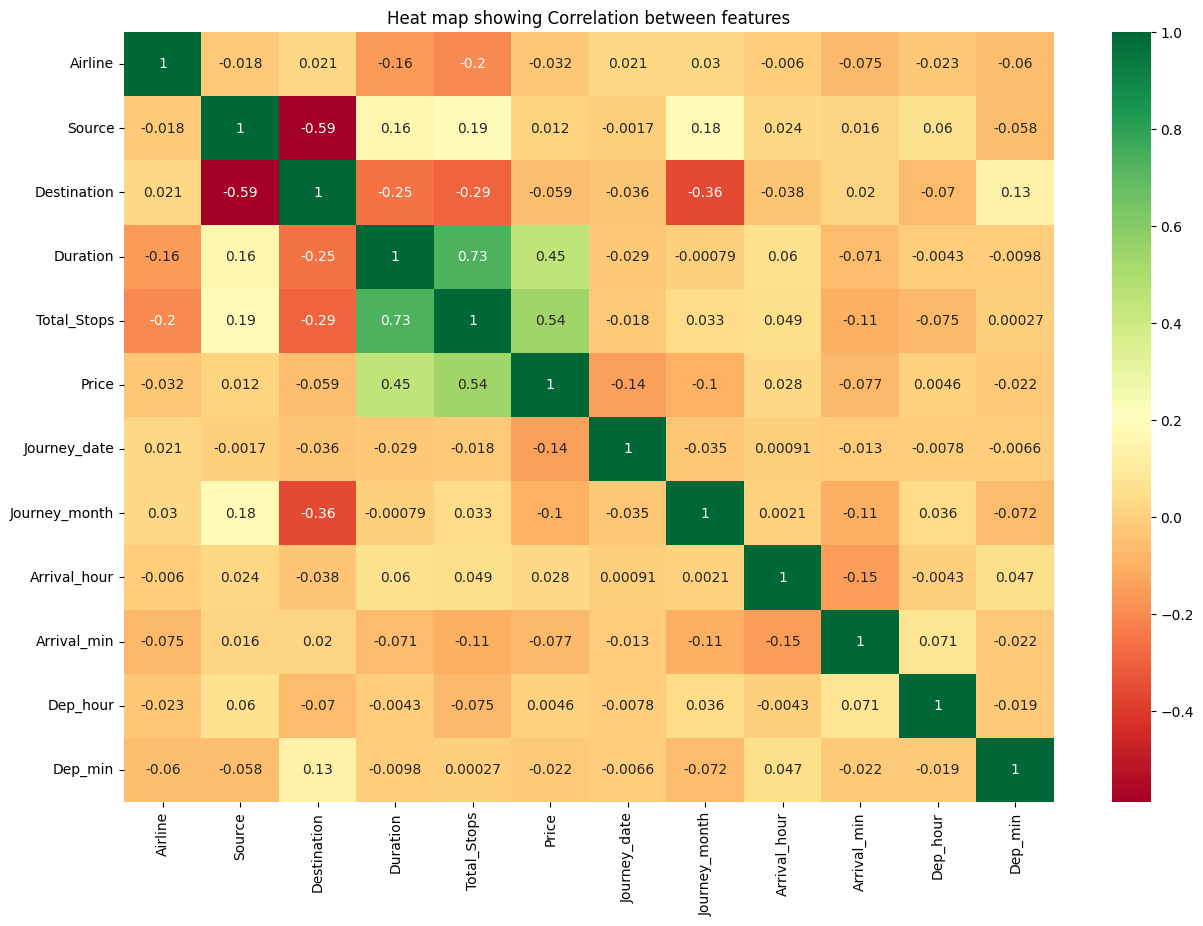

In [52]:
plt.figure(figsize=(15,10))

sns.heatmap(flight_df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")

plt.show()

#### There is a high correlation between:
- Price & Total Stops
- Price & flight duration
- Duration & Total stops

### Building Machine Learning models

For predicting the Price, we build 3 models using the following algorithms: 
- Linear Regression
- Decision Tree regressor
- Random Forest Regressor

Compare the accuracies got from these 3 models and select the best model.
Apply hyperparameter tuning to increase its efficiency.
        

In [53]:
#splitting data into train and test dataframe 
train_df=flight_df[0:10683]
test_df=flight_df[10683:]

In [54]:
print(train_df.shape)
print(test_df.shape)

(10683, 12)
(2425, 12)


In [55]:
#splitting data into x and y
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values

In [56]:
# spiliting the dataset into train data and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)

#### Import models

In [57]:

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'R² Score', 'MAE', 'MSE'])

In [58]:
# Function to train the models and evaluate
def predict(algorithm):
    print("Algorithm:", algorithm.__class__.__name__)  # Print the name of the algorithm
    model = algorithm.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)  # Calculate R² score
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    results.loc[len(results)] = [algorithm.__class__.__name__, r2, mae, mse]

In [59]:
# Example usage of the function with different algorithms
algorithms = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(kernel='linear')  # Using linear kernel for SVR
]

### Scale the features ( standardization) fro svr

In [60]:
# Scale features for SVR
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
# Loop through the algorithms and make predictions
for algo in algorithms:
    if algo.__class__.__name__ == 'SVR':
        # Use the scaled features for SVR
        predict(algo.fit(x_train_scaled, y_train))
    else:
        predict(algo)

# Display the results DataFrame
print("\nModel Evaluation Results:")
results

Algorithm: LinearRegression
Algorithm: DecisionTreeRegressor
Algorithm: RandomForestRegressor
Algorithm: SVR

Model Evaluation Results:


,Model,R² Score,MAE,MSE
0,LinearRegression,0.454035,2427.889863,1.023165e+07
1,DecisionTreeRegressor,0.610954,1536.333192,7.290914e+06
2,RandomForestRegressor,0.777202,1299.588456,4.175351e+06
3,SVR,0.327818,2492.648529,1.259703e+07


The **Random Forest Regressor model** turned out to be the most accurate one out of the 3 models.

Let's try to improve the accuracy by doing Hyperparameter tuning.

### Hyperparameter tuning

#### Applying  Random Search to find the best parameters

In [62]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [63]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [64]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8051754150503736

#### After hypertuning, the accuracy increases.

In [65]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8051754150503736
MAE: 1295.5308988385614
MSE: 3651109.1286377516
RMSE: 1910.7875676374263


# For Random Forest Regressor,
- Before hyper tuning, R2 score = 78 %
- After hyper tuning, R2 score = 80 % 


### save the model

In [66]:
from pickle import dump
dump(rf_model,open('flightfare.pkl','wb'))



##### Conclusion

We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning. As a result, we have trained our **Random Forest Regression model**, to forecast fares of flight tickets, with an R2 score of 80 %.